# EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# First of all, we import all the packages that are required in this porject. 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy import stats
import datetime

In [3]:
data = pd.read_csv("bank-full.csv")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# EDA

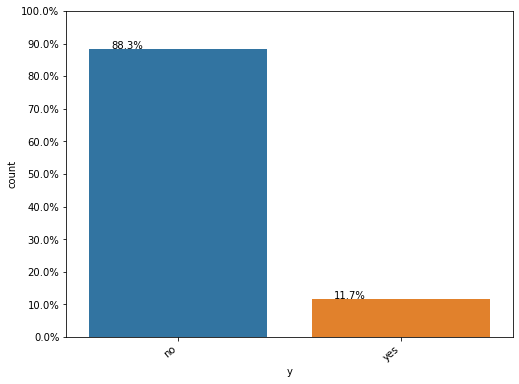

In [5]:
  plt.figure(figsize=(8,6))
  Y = data["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=data)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

We can see from the above plot that the dataset in imbalanced, where the number of negative class is close to 8 times the number of positive class.

In [6]:
def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [22]:
data.select_dtypes(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

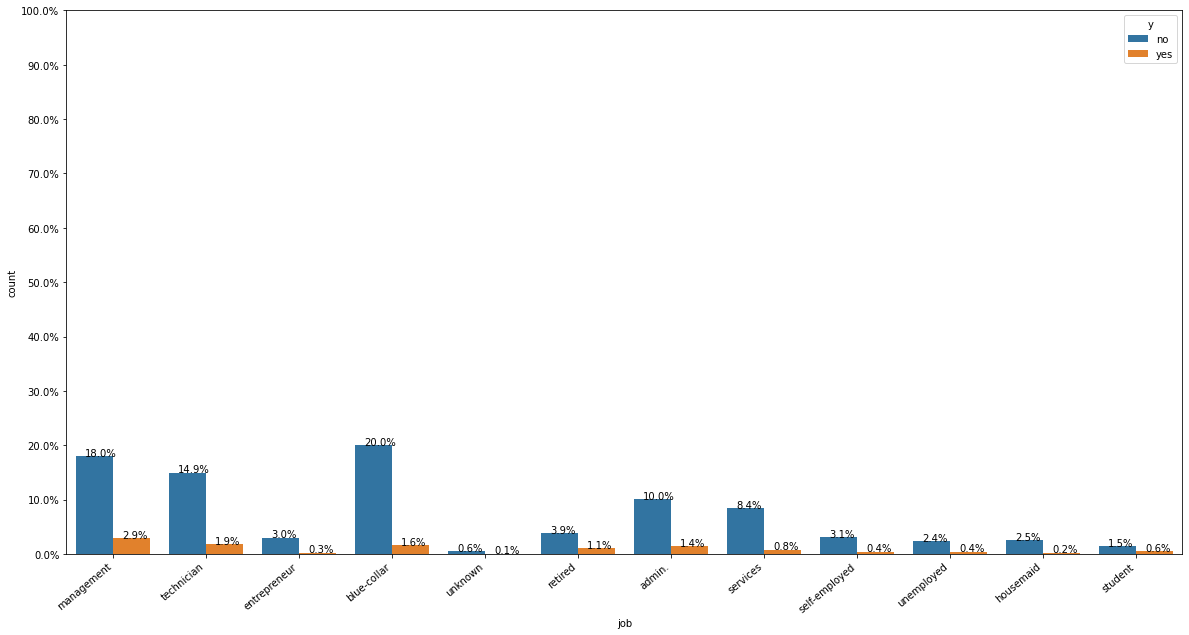

In [23]:
countplot_withY(data.select_dtypes(include=["object"]).columns[0], data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

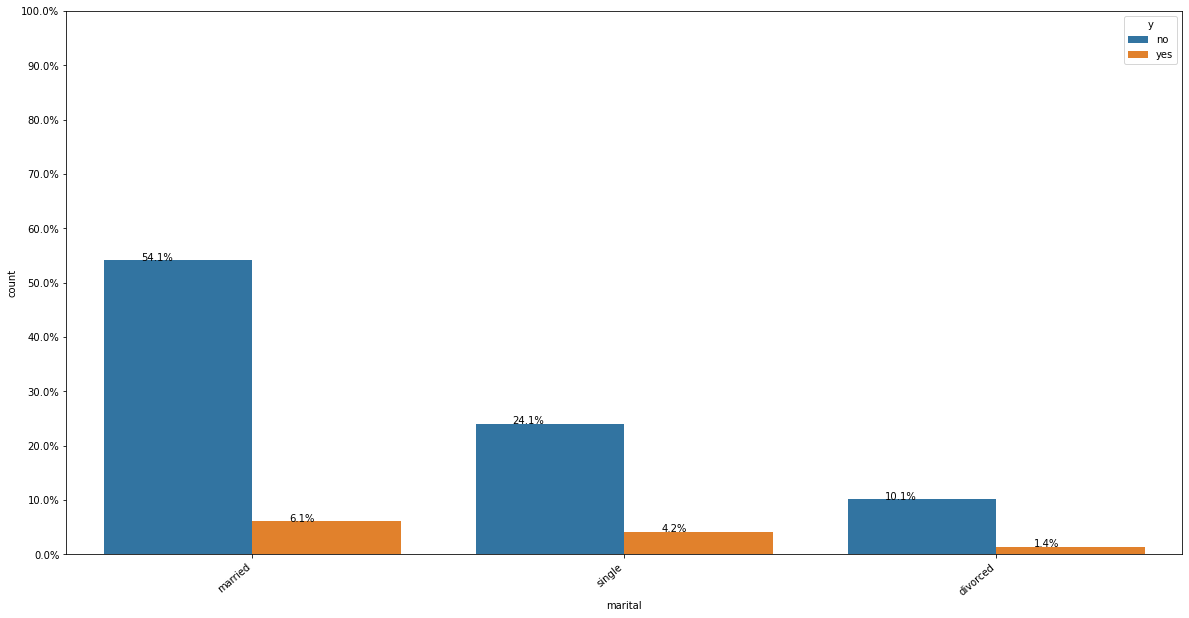

In [24]:
countplot_withY(data.select_dtypes(include=["object"]).columns[1], data)

Majority of the customers are married. Followed by Single, divorced and unknown.

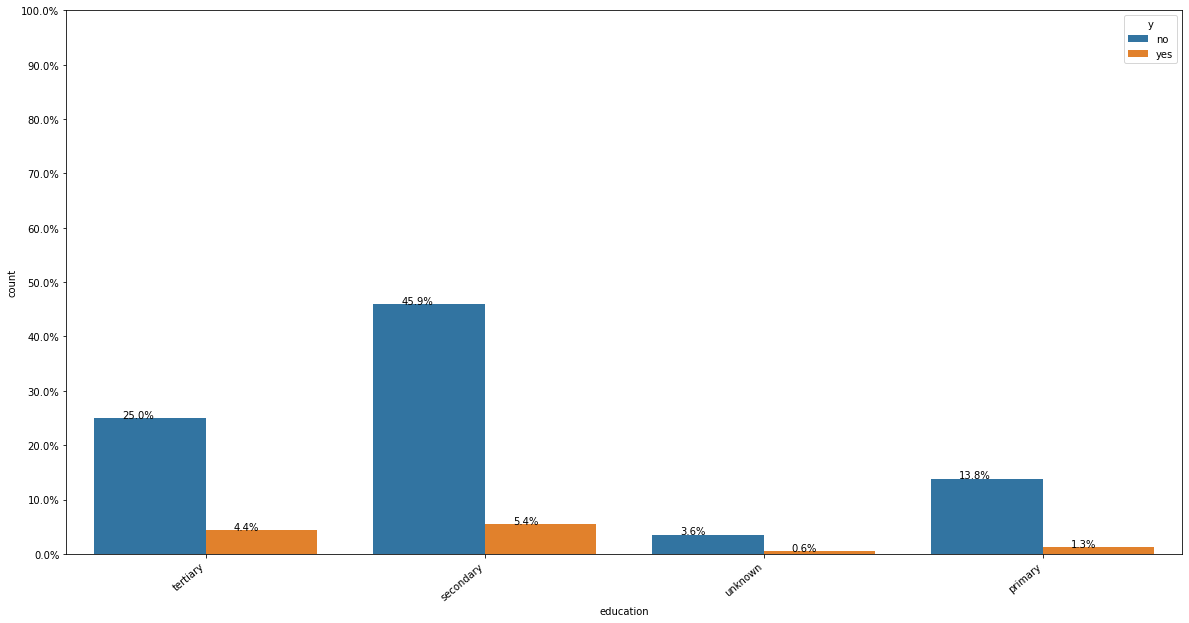

In [25]:
countplot_withY(data.select_dtypes(include=["object"]).columns[2], data)

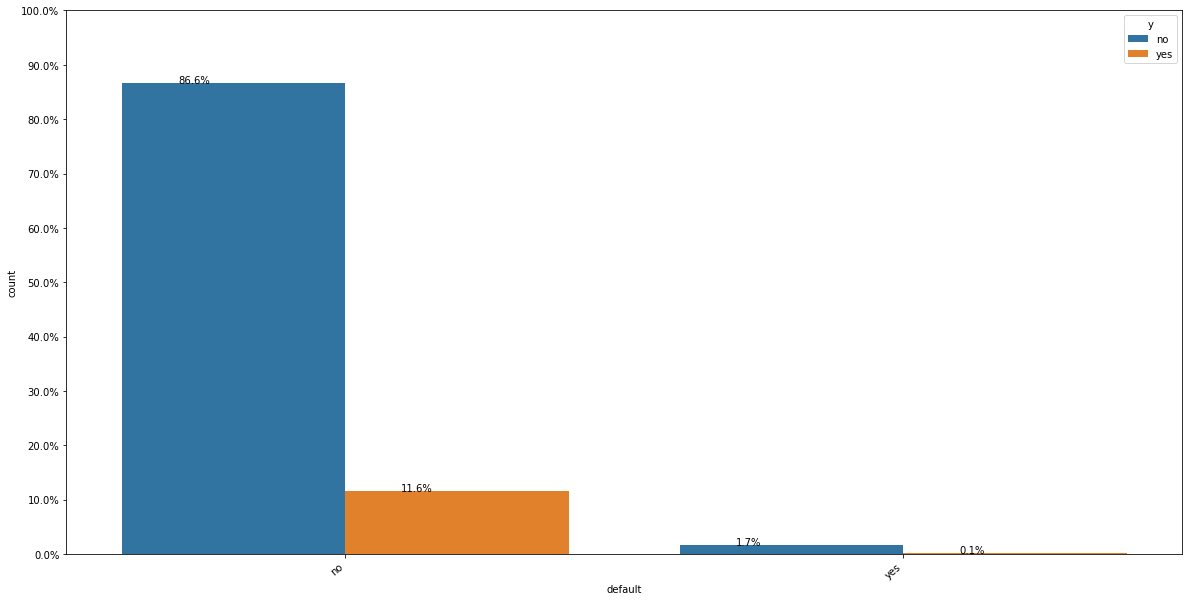

In [26]:
countplot_withY(data.select_dtypes(include=["object"]).columns[3], data)

Default: Denotes if the customer has credit in default or not. The categories are yes, no and unknown.

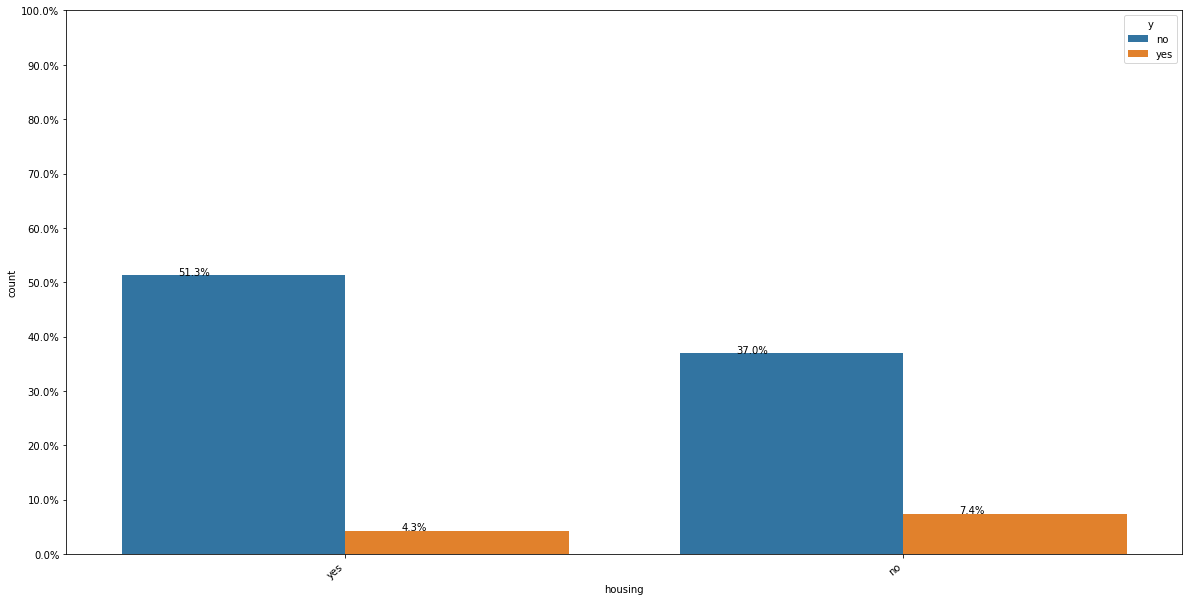

In [27]:
countplot_withY(data.select_dtypes(include=["object"]).columns[4], data)

housing: Denotes if the customer has a housing loan. Three categories are ‘no’, ’yes’, ’unknown’.

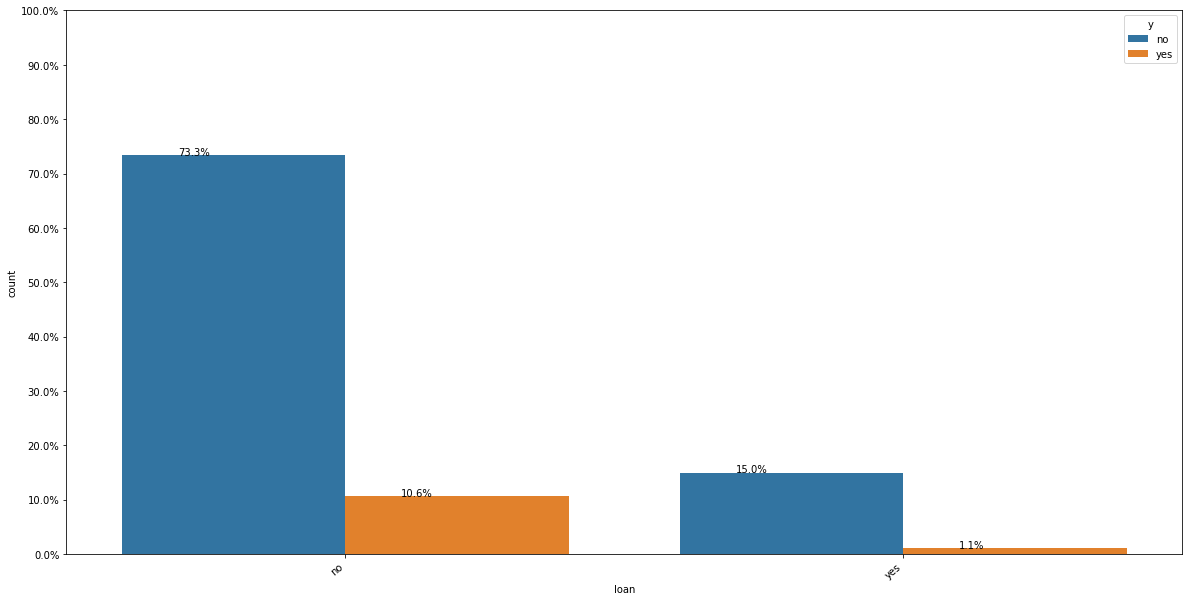

In [28]:
countplot_withY(data.select_dtypes(include=["object"]).columns[5], data)

As we can see from the above plot, majority of the customers have a housing loan.

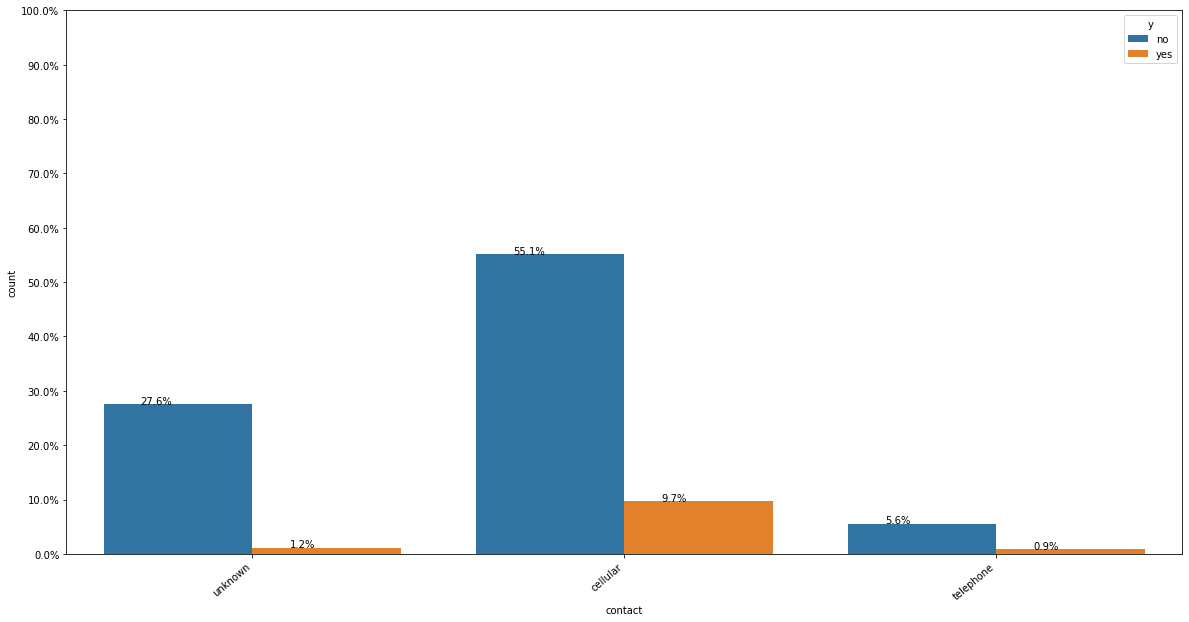

In [29]:
countplot_withY(data.select_dtypes(include=["object"]).columns[6], data)

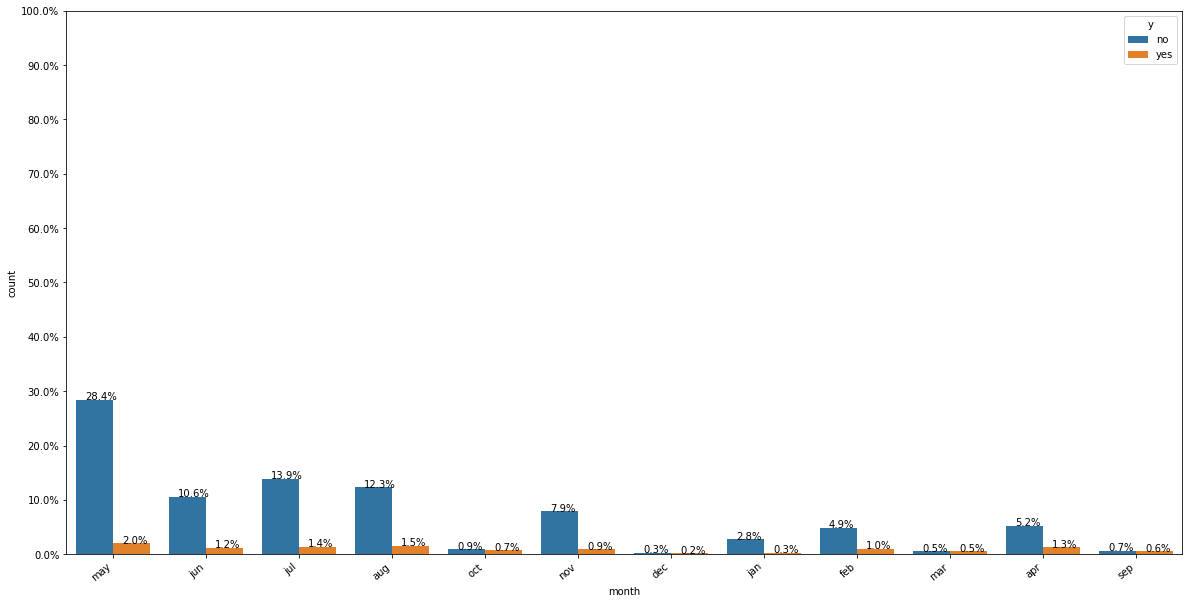

In [30]:
countplot_withY(data.select_dtypes(include=["object"]).columns[7], data)

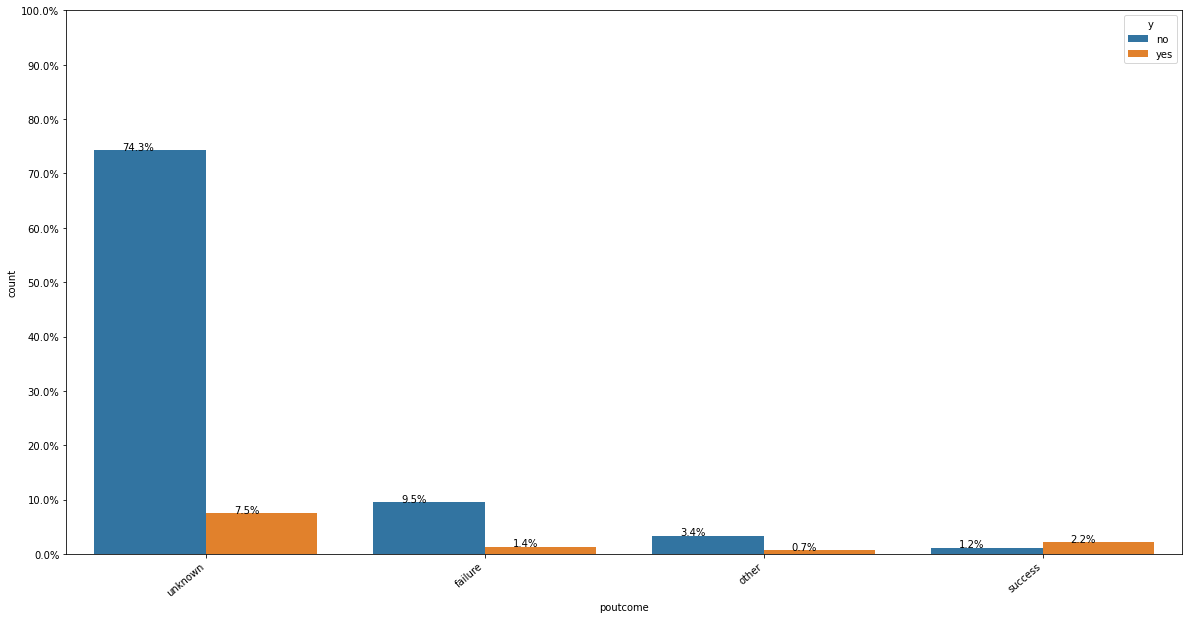

In [31]:
countplot_withY(data.select_dtypes(include=["object"]).columns[8], data)

poutcome: This feature denotes the outcome of the previous marketing campaign.

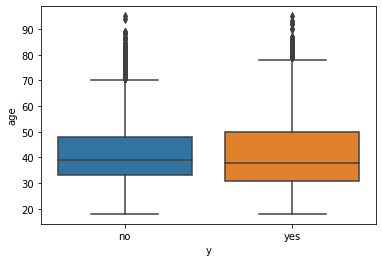

In [33]:
sns.boxplot(data=data, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. And the boxplot for both the classes overlap quite a lot, which means that age isn’t necessarily a good indicator for which customer will subscribe and which customer will not.

<AxesSubplot:xlabel='age', ylabel='Density'>

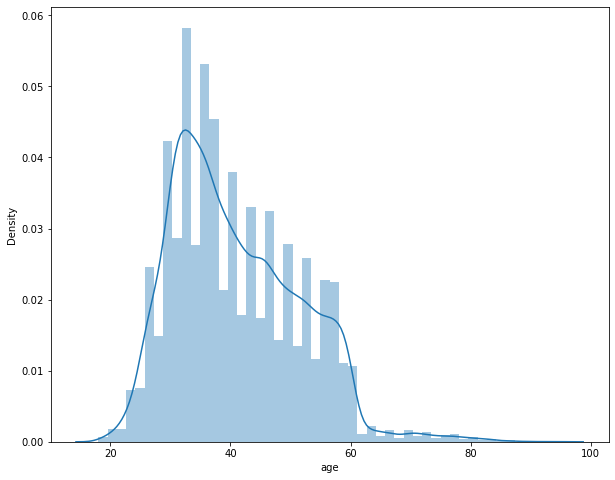

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

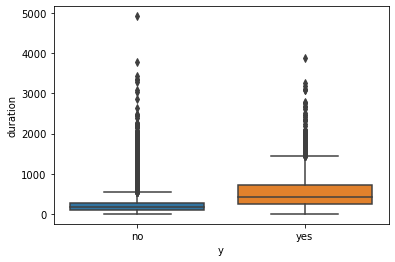

In [35]:
sns.boxplot(data=data, x="y", y="duration")
plt.show()

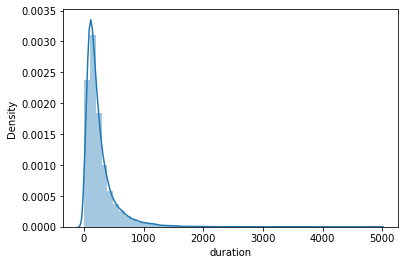

In [36]:
sns.distplot(data['duration'])
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

Text(0.5, 1.05, 'Pearson correlation of Features')

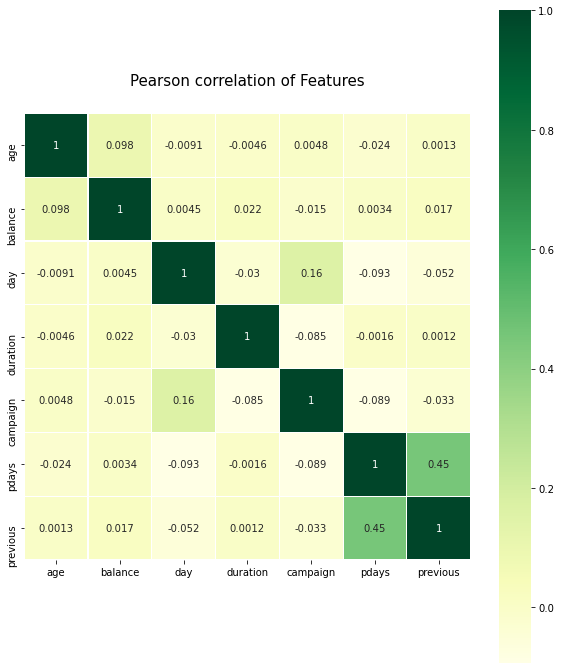

In [37]:
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

previous and pdays have the highest correlation with value of 0.45

# Final Recommendations

 - The customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. So the buiseness should send offers to them.
 - Majority of the customers are married. Followed by Single, divorced and unknown. The campaign should focus on the married customers
 - Customers with education is secondary is the highest with yes,so the campaigns should focus on those customers
 - When customers has no credit in default, the customers is likely to buy our product. So the campaign should focus on those customers
 - Customers with no housing loans are likely to buy our product
 - Majority of the customers have a housing loan.
 - Customers with cellular phones are likely to buy our products
 - Customers with unknown outcome of the previous marketing campaign is the majority
 - Both the customers that subscibed or didn’t subscribe a term deposit, has a median age of around 38–40. So, the campaign should focus on this age group
 - Age and duration are not necessarily a good indicator for which customer will subscribe and which customer will not.